In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))
# removed this since we are not uploading this to kaggle

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/steph/mental-health-research-proj/student_mental_health.csv')
# changed this to work with my directory

In [4]:
df.shape
# 101 instances and 11 attributes

(101, 11)

In [5]:
df.head()
# preview of dataset

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,1,18,Engineering,1,3,0,1,0,1,0
1,8/7/2020 12:04,0,21,Islamic education,2,3,0,0,1,0,0
2,8/7/2020 12:05,0,19,BIT,1,3,0,1,1,1,0
3,8/7/2020 12:06,1,22,Laws,3,3,1,1,0,0,0
4,8/7/2020 12:13,0,23,Mathemathics,4,3,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Timestamp                                    101 non-null    object
 1   Choose_your_gender                           101 non-null    int64 
 2   Age                                          101 non-null    int64 
 3   What_is_your_course                          101 non-null    object
 4   Your_current_year_of_Study                   101 non-null    int64 
 5   What_is_your_CGPA                            101 non-null    int64 
 6   Marital_status                               101 non-null    int64 
 7   Do_you_have_Depression                       101 non-null    int64 
 8   Do_you_have_Anxiety                          101 non-null    int64 
 9   Do_you_have_Panic_attack                     101 non-null    int64 
 10  Did_you_seek_a

In [7]:
df.isnull().sum()

Timestamp                                      0
Choose_your_gender                             0
Age                                            0
What_is_your_course                            0
Your_current_year_of_Study                     0
What_is_your_CGPA                              0
Marital_status                                 0
Do_you_have_Depression                         0
Do_you_have_Anxiety                            0
Do_you_have_Panic_attack                       0
Did_you_seek_any_specialist_for_a_treatment    0
dtype: int64

In [8]:
df.describe()

,Choose_your_gender,Age,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.742574,20.544554,1.970297,3.277228,0.158416,0.346535,0.336634,0.326733,0.059406
std,0.439397,2.488071,0.994540,0.939349,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,19.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.000000,3.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['Timestamp'].unique()
# view the labels in the variable

array(['8/7/2020 12:02', '8/7/2020 12:04', '8/7/2020 12:05',
       '8/7/2020 12:06', '8/7/2020 12:13', '8/7/2020 12:31',
       '8/7/2020 12:32', '8/7/2020 12:33', '8/7/2020 12:35',
       '8/7/2020 12:39', '8/7/2020 12:40', '8/7/2020 12:41',
       '8/7/2020 12:43', '8/7/2020 12:46', '8/7/2020 12:52',
       '8/7/2020 13:05', '8/7/2020 13:07', '8/7/2020 13:12',
       '8/7/2020 13:13', '8/7/2020 13:15', '8/7/2020 13:17',
       '8/7/2020 13:29', '8/7/2020 13:35', '8/7/2020 13:41',
       '8/7/2020 13:58', '8/7/2020 14:05', '8/7/2020 14:27',
       '8/7/2020 14:29', '8/7/2020 14:31', '8/7/2020 14:41',
       '8/7/2020 14:43', '8/7/2020 14:45', '8/7/2020 14:47',
       '8/7/2020 14:56', '8/7/2020 14:57', '8/7/2020 14:58',
       '8/7/2020 15:07', '8/7/2020 15:08', '8/7/2020 15:09',
       '8/7/2020 15:12', '8/7/2020 15:14', '8/7/2020 15:18',
       '8/7/2020 15:27', '8/7/2020 15:37', '8/7/2020 15:47',
       '8/7/2020 15:48', '8/7/2020 15:57', '8/7/2020 15:58',
       '8/7/2020 16:08',

In [10]:
len(df['Timestamp'].unique())
# how many different types of variables

92

In [11]:
# df['status_published'].unique()

In [12]:
# len(df['status_published'].unique())

In [13]:
# df['status_type'].unique()

In [14]:
# len(df['status_type'].unique())

In [15]:
df.drop(['Timestamp'], axis=1, inplace=True)
# drops timestamp from df for graph

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Choose_your_gender                           101 non-null    int64 
 1   Age                                          101 non-null    int64 
 2   What_is_your_course                          101 non-null    object
 3   Your_current_year_of_Study                   101 non-null    int64 
 4   What_is_your_CGPA                            101 non-null    int64 
 5   Marital_status                               101 non-null    int64 
 6   Do_you_have_Depression                       101 non-null    int64 
 7   Do_you_have_Anxiety                          101 non-null    int64 
 8   Do_you_have_Panic_attack                     101 non-null    int64 
 9   Did_you_seek_any_specialist_for_a_treatment  101 non-null    int64 
dtypes: int64(9), o

In [17]:
df.head()

,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,1,18,Engineering,1,3,0,1,0,1,0
1,0,21,Islamic education,2,3,0,0,1,0,0
2,0,19,BIT,1,3,0,1,1,1,0
3,1,22,Laws,3,3,1,1,0,0,0
4,0,23,Mathemathics,4,3,0,0,0,0,0


In [18]:
X = df

y = df['Do_you_have_Anxiety']

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['What_is_your_course'] = le.fit_transform(X['What_is_your_course'])
# encode courses to integer 

# y = le.transform(y)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Choose_your_gender                           101 non-null    int64
 1   Age                                          101 non-null    int64
 2   What_is_your_course                          101 non-null    int64
 3   Your_current_year_of_Study                   101 non-null    int64
 4   What_is_your_CGPA                            101 non-null    int64
 5   Marital_status                               101 non-null    int64
 6   Do_you_have_Depression                       101 non-null    int64
 7   Do_you_have_Anxiety                          101 non-null    int64
 8   Do_you_have_Panic_attack                     101 non-null    int64
 9   Did_you_seek_any_specialist_for_a_treatment  101 non-null    int64
dtypes: int64(10)
memory usage:

In [21]:
X.head()

,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,1,18,17,1,3,0,1,0,1,0
1,0,21,25,2,3,0,0,1,0,0
2,0,19,4,1,3,0,1,1,1,0
3,1,22,33,3,3,1,1,0,0,0
4,0,23,37,4,3,0,0,0,0,0


In [22]:
cols = X.columns

In [23]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [24]:
X = pd.DataFrame(X, columns=[cols])

In [25]:
X.head()

,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,1.0,0.000000,0.354167,0.000000,0.75,0.0,1.0,0.0,1.0,0.0
1,0.0,0.500000,0.520833,0.333333,0.75,0.0,0.0,1.0,0.0,0.0
2,0.0,0.166667,0.083333,0.000000,0.75,0.0,1.0,1.0,1.0,0.0
3,1.0,0.666667,0.687500,0.666667,0.75,1.0,1.0,0.0,0.0,0.0
4,0.0,0.833333,0.770833,1.000000,0.75,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

X.info()

kmeans.fit(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   (Choose_your_gender,)                           101 non-null    float64
 1   (Age,)                                          101 non-null    float64
 2   (What_is_your_course,)                          101 non-null    float64
 3   (Your_current_year_of_Study,)                   101 non-null    float64
 4   (What_is_your_CGPA,)                            101 non-null    float64
 5   (Marital_status,)                               101 non-null    float64
 6   (Do_you_have_Depression,)                       101 non-null    float64
 7   (Do_you_have_Anxiety,)                          101 non-null    float64
 8   (Do_you_have_Panic_attack,)                     101 non-null    float64
 9   (Did_you_seek_any_specialist_for_a_treatmen

KMeans(n_clusters=2, random_state=0)

In [27]:
kmeans.cluster_centers_

array([[ 8.52941176e-01,  3.62745098e-01,  4.03186275e-01,
         3.13725490e-01,  8.23529412e-01,  4.70588235e-01,
         1.00000000e+00,  5.29411765e-01,  5.00000000e-01,
         1.76470588e-01],
       [ 6.86567164e-01,  4.55223881e-01,  3.31156716e-01,
         3.28358209e-01,  8.17164179e-01, -8.32667268e-17,
         1.49253731e-02,  2.38805970e-01,  2.38805970e-01,
        -4.85722573e-17]])

In [28]:
kmeans.inertia_

116.31057488293824

In [29]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 32 out of 101 samples were correctly labeled.


In [30]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.32


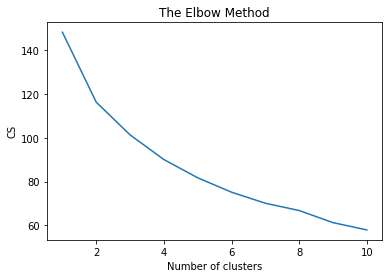

In [31]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 32 out of 101 samples were correctly labeled.
Accuracy score: 0.32


In [33]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 22 out of 101 samples were correctly labeled.
Accuracy score: 0.22


In [34]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 17 out of 101 samples were correctly labeled.
Accuracy score: 0.17


In [35]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 22 out of 101 samples were correctly labeled.
Accuracy score: 0.22


In [36]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 40 out of 101 samples were correctly labeled.
Accuracy score: 0.40


In [37]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 9 out of 101 samples were correctly labeled.
Accuracy score: 0.09


In [38]:
kmeans = KMeans(n_clusters=8, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 39 out of 101 samples were correctly labeled.
Accuracy score: 0.39


In [39]:
kmeans = KMeans(n_clusters=9, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 12 out of 101 samples were correctly labeled.
Accuracy score: 0.12


In [40]:
kmeans = KMeans(n_clusters=10, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2 out of 101 samples were correctly labeled.
Accuracy score: 0.02
